In [3]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from Seq2Seq import Seq2Seq
from torch.utils.data import DataLoader
import io
import imageio
from ipywidgets import widgets, HBox
import matplotlib.pyplot as plt
from ConvLSTM import ConvLSTM
from tqdm.notebook import tqdm
import pickle
from datetime import datetime
from util import data_iter, normalize_and_split
import copy
import os

# Control whether we want to compute the loss function based on 
# the entire predicted sequence (original sequence shifted by one)
# or compute the loss function based on the last predicted frame only
entire_sequence_version=False

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [47]:
import pandas as pd

In [2]:
with open("./data/train_data.pkl", "rb") as f:
    train_data=pickle.load(f)
with open("./data/val_data.pkl", "rb") as f:
    val_data=pickle.load(f)
with open("./data/test_data.pkl", "rb") as f:
    test_data=pickle.load(f)

train_data=train_data
val_data=val_data
test_data=test_data
del train_data[364]
del train_data[1456]
del train_data[1764]
del train_data[4015]
del test_data[163]
num_train=len(train_data)
num_val=len(val_data)
num_test=len(test_data)

num layers: 1 num kernels: 32 lr: 0.0001 kernel size: 3
validation loss: 10.974005919959158
test loss: 10.837770809680958


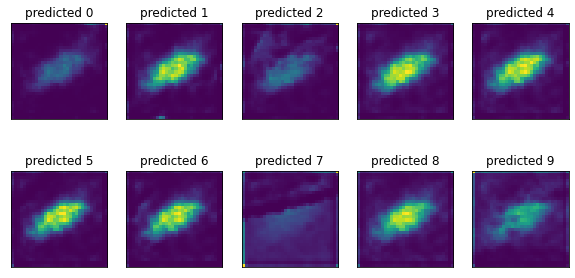

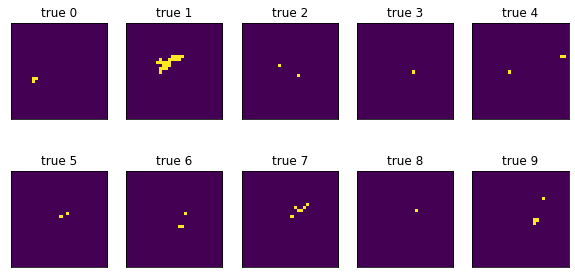

num layers: 1 num kernels: 32 lr: 0.0001 kernel size: 5
validation loss: 9.673466301903936
test loss: 9.272450188697853


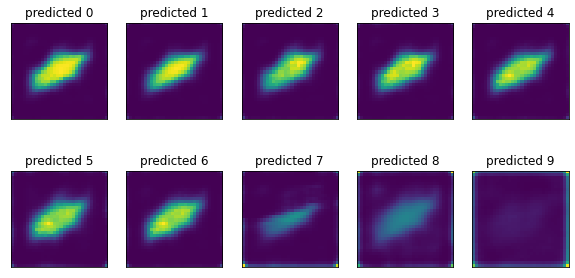

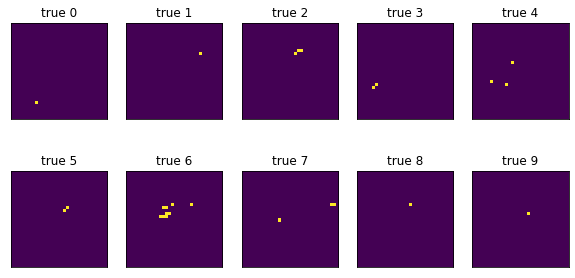

num layers: 1 num kernels: 32 lr: 0.0001 kernel size: 7
validation loss: 10.247539322951745
test loss: 8.753167363810421


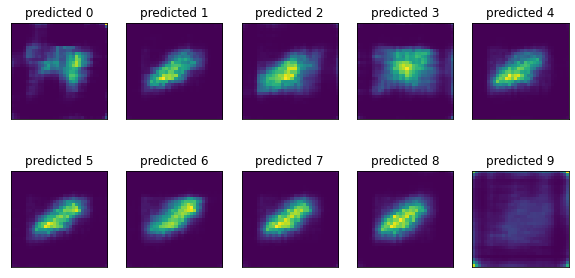

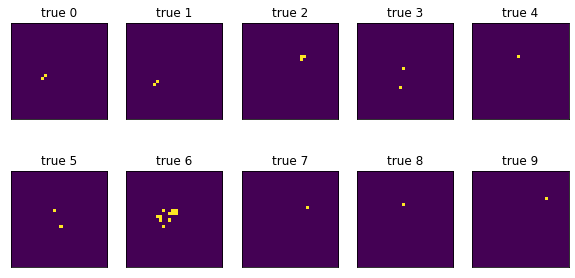

num layers: 1 num kernels: 32 lr: 1e-05 kernel size: 3
validation loss: 16.448684974256995
test loss: 15.646622869181515


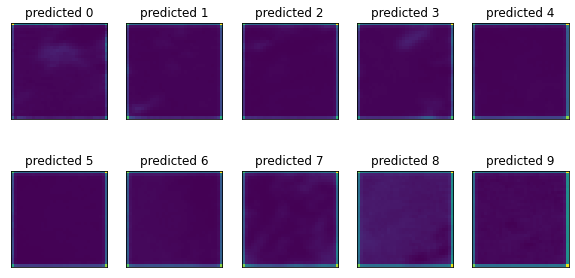

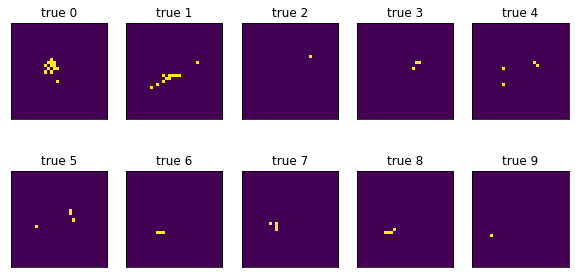

num layers: 1 num kernels: 32 lr: 1e-05 kernel size: 5
validation loss: 15.564538551668816
test loss: 13.958037352914294


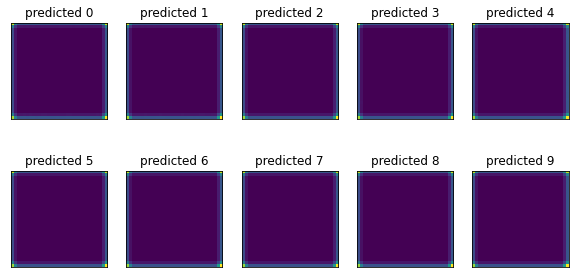

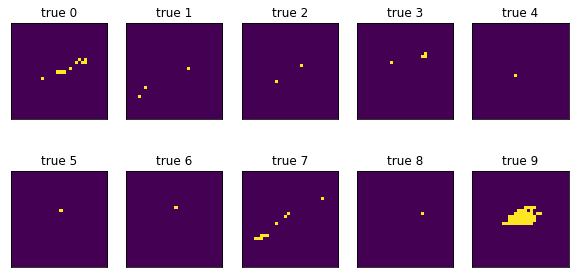

num layers: 1 num kernels: 32 lr: 1e-05 kernel size: 7
validation loss: 17.010073657106297
test loss: 15.2341221964418


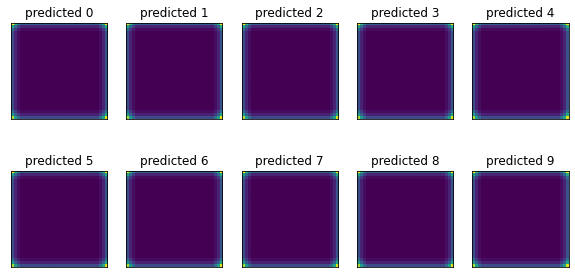

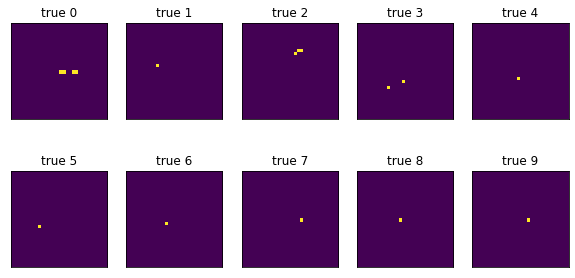

num layers: 1 num kernels: 64 lr: 0.0001 kernel size: 3
validation loss: 10.12383117112033
test loss: 11.527854806683921


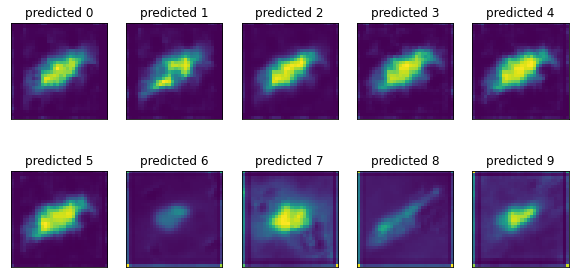

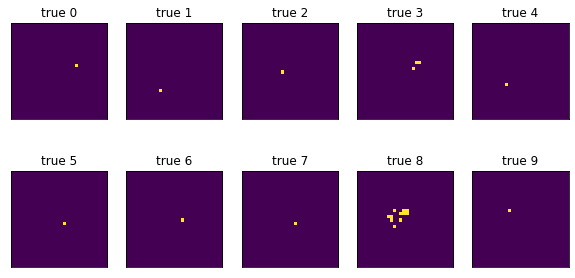

num layers: 1 num kernels: 64 lr: 0.0001 kernel size: 5
validation loss: 10.717531326369112
test loss: 10.184567193092384


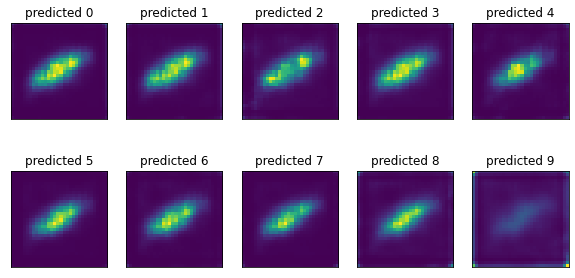

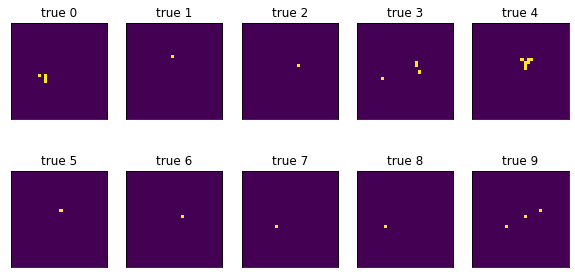

num layers: 1 num kernels: 64 lr: 0.0001 kernel size: 7
validation loss: 10.648480081793123
test loss: 8.25359810514403


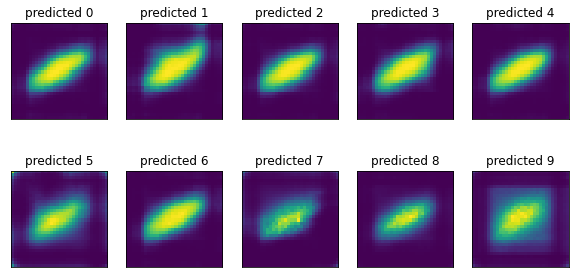

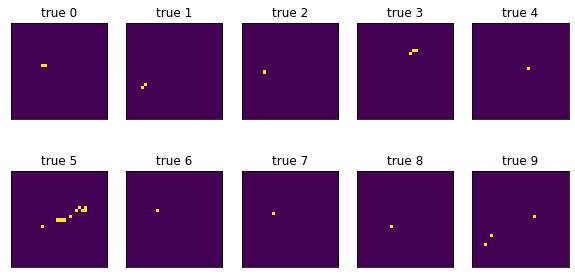

num layers: 1 num kernels: 64 lr: 1e-05 kernel size: 3
validation loss: 15.476758985096598
test loss: 15.595111377133524


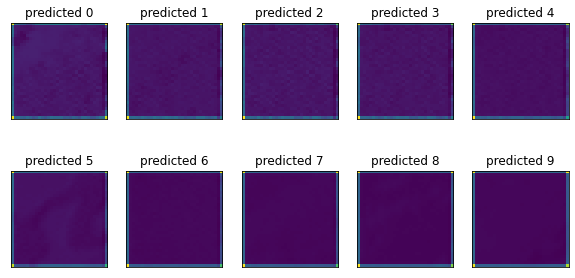

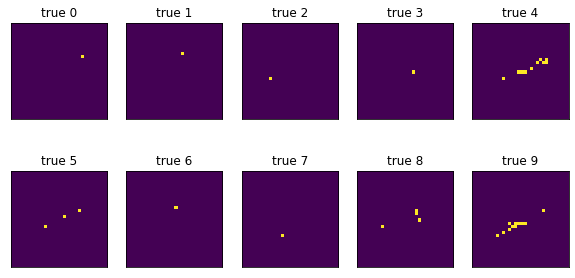

num layers: 1 num kernels: 64 lr: 1e-05 kernel size: 5
validation loss: 18.89642717333263
test loss: 14.41038768749519


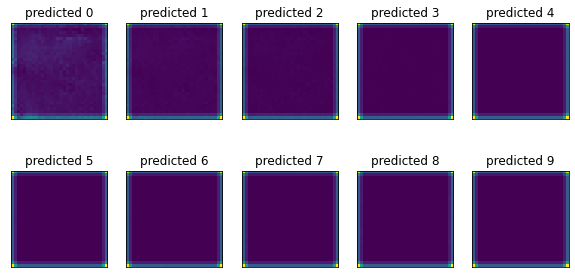

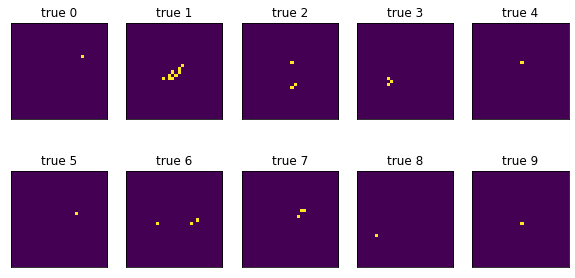

num layers: 1 num kernels: 64 lr: 1e-05 kernel size: 7
validation loss: 16.355976931567263
test loss: 13.281994410923549


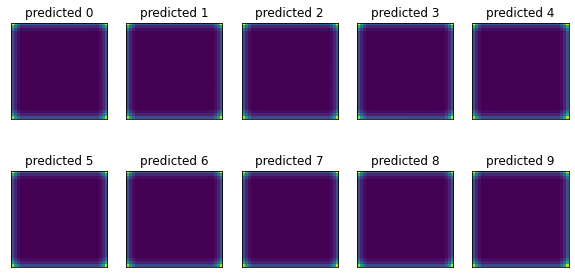

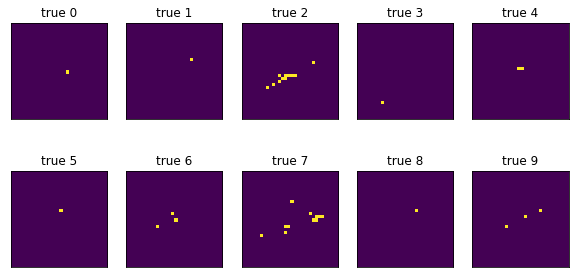

num layers: 1 num kernels: 96 lr: 0.0001 kernel size: 3
validation loss: 11.720430853331617
test loss: 10.385280891005042


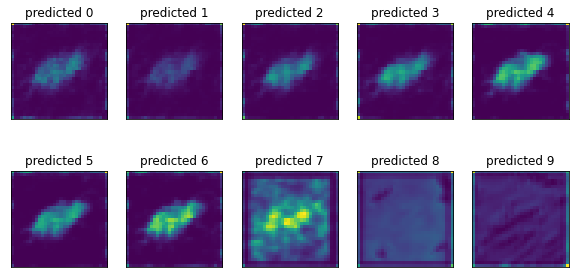

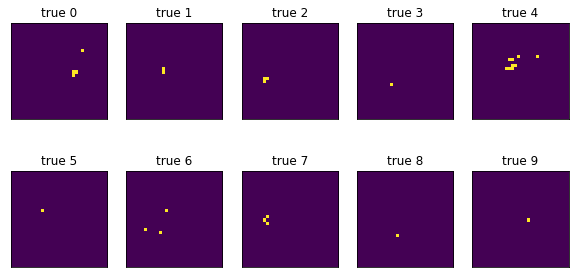

num layers: 1 num kernels: 96 lr: 0.0001 kernel size: 5
validation loss: 15.095488863038312
test loss: 15.463330273557766


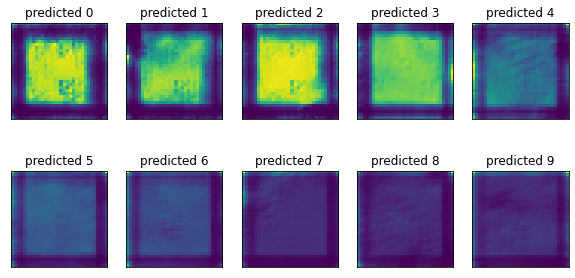

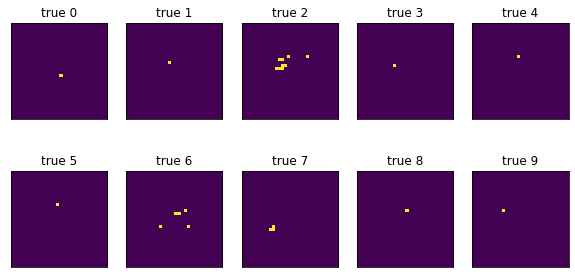

num layers: 1 num kernels: 96 lr: 0.0001 kernel size: 7
validation loss: 74.19324718907549
test loss: 10.154610770089286


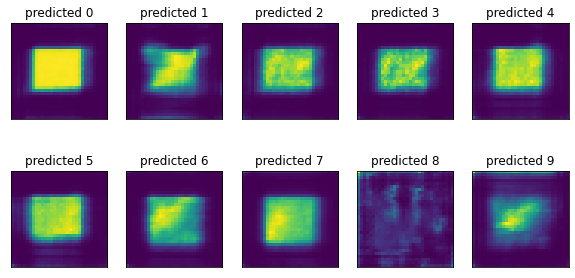

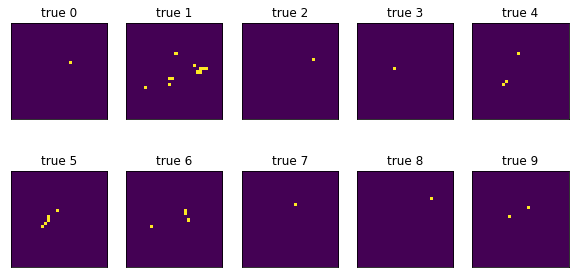

num layers: 1 num kernels: 96 lr: 1e-05 kernel size: 3
validation loss: 15.069855713491956
test loss: 14.700011305033867


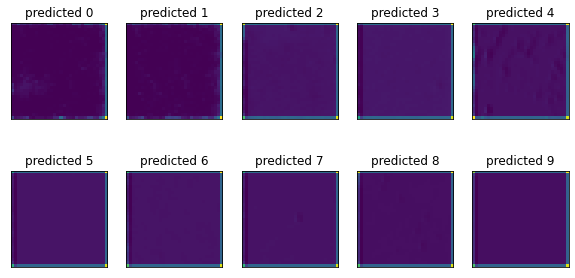

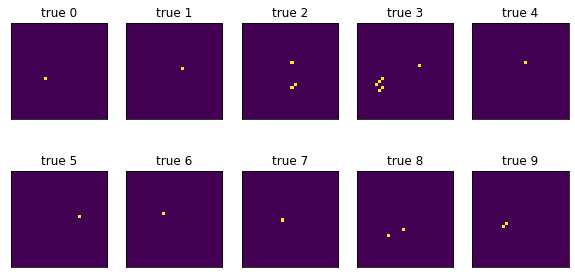

num layers: 1 num kernels: 96 lr: 1e-05 kernel size: 5
validation loss: 39.22754086649476
test loss: 24.651130638686308


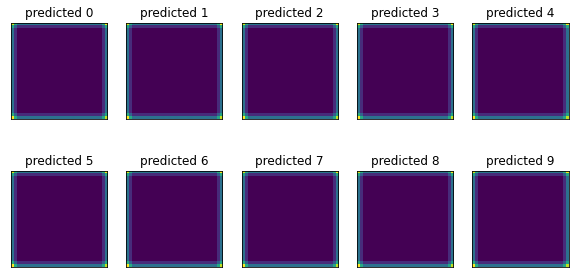

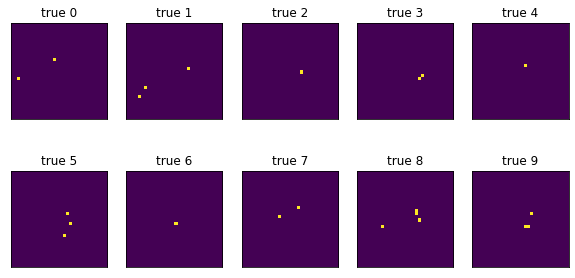

num layers: 1 num kernels: 96 lr: 1e-05 kernel size: 7
validation loss: 15.782007734176561
test loss: 13.72346135783078


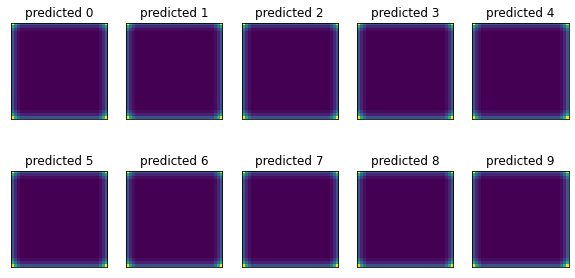

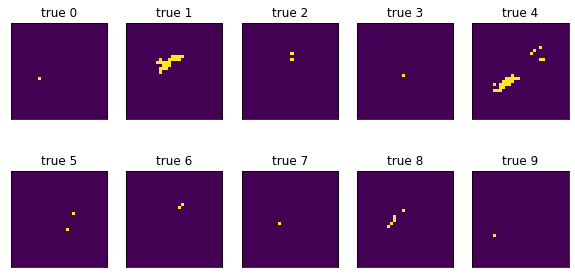

num layers: 3 num kernels: 32 lr: 0.0001 kernel size: 3
validation loss: 18.498275878981417
test loss: 10.797123387529345


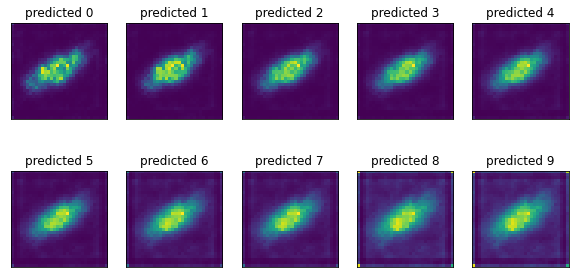

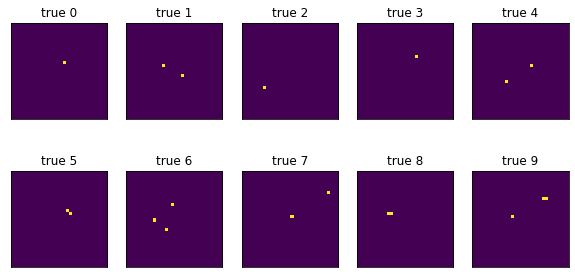

num layers: 3 num kernels: 32 lr: 0.0001 kernel size: 5
validation loss: 11.489916402130879
test loss: 11.018315958859297


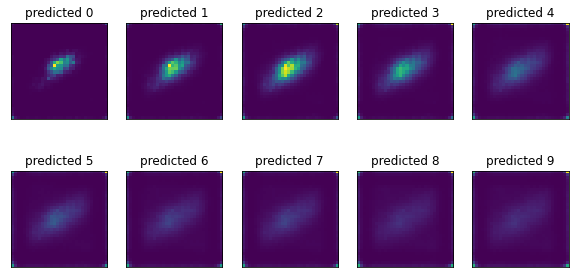

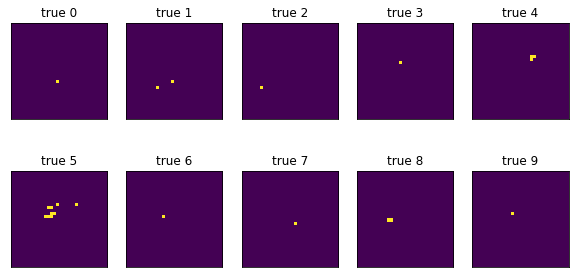

num layers: 3 num kernels: 32 lr: 0.0001 kernel size: 7
validation loss: 10.875183838341623
test loss: 8.300218666715574


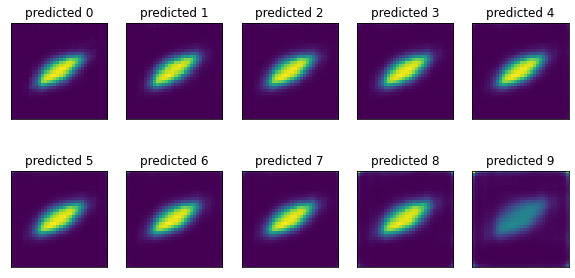

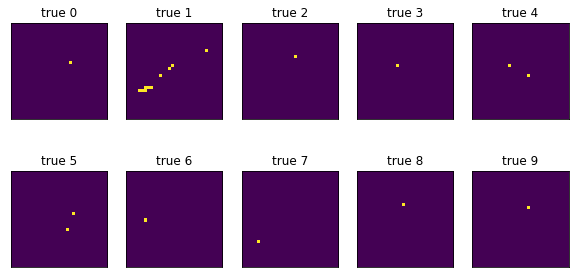

num layers: 3 num kernels: 32 lr: 1e-05 kernel size: 3
validation loss: 15.44291987677513
test loss: 13.927198438221598


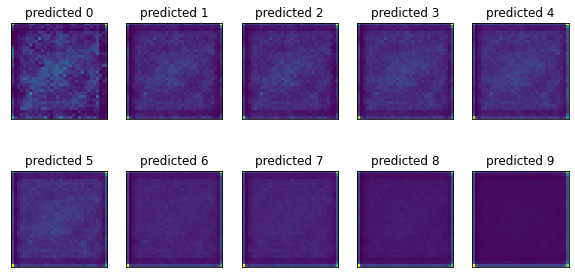

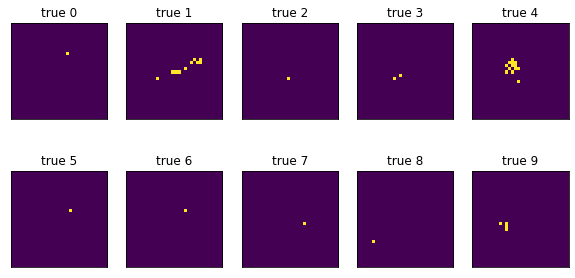

num layers: 3 num kernels: 32 lr: 1e-05 kernel size: 5
validation loss: 13.034852671505782
test loss: 10.456036985801358


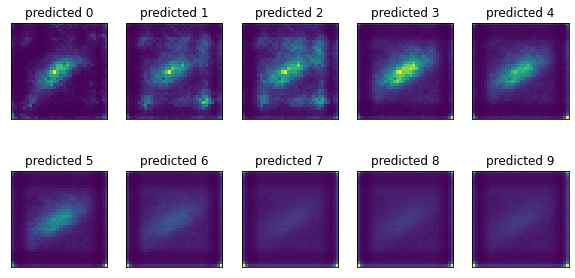

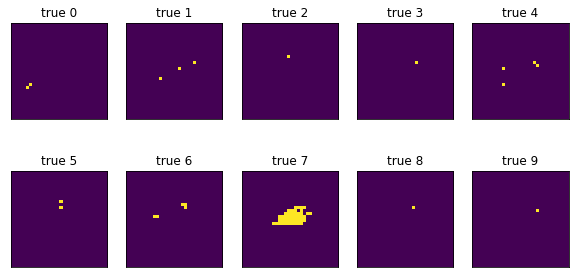

num layers: 3 num kernels: 32 lr: 1e-05 kernel size: 7
validation loss: 14.39813241817681
test loss: 11.8986524008765


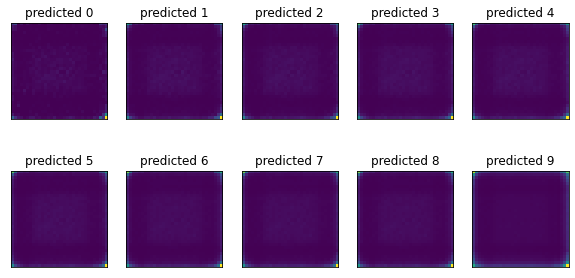

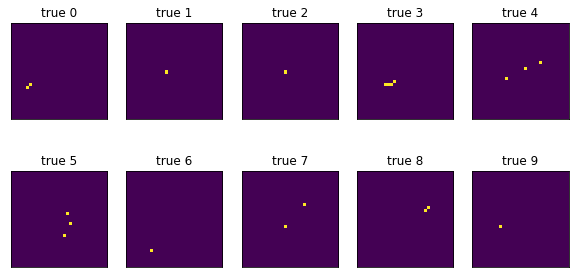

num layers: 3 num kernels: 64 lr: 0.0001 kernel size: 3
validation loss: 11.840229353881234
test loss: 9.296504824032338


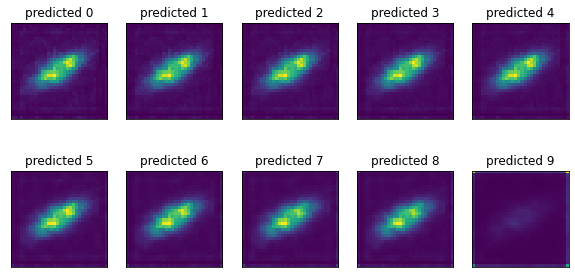

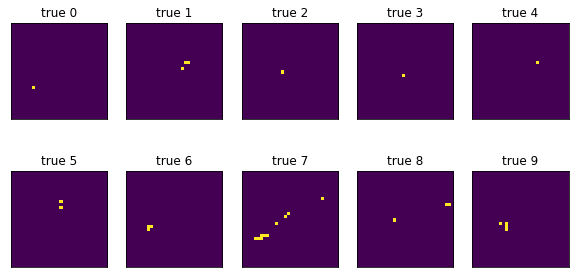

num layers: 3 num kernels: 64 lr: 0.0001 kernel size: 5
validation loss: 11.300391803234081
test loss: 10.397509288318052


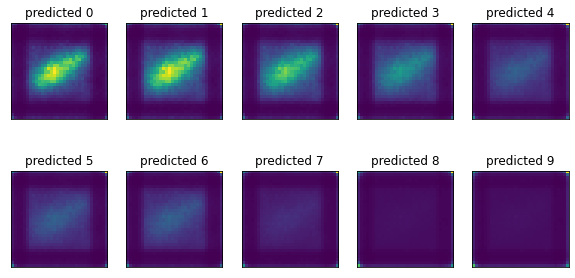

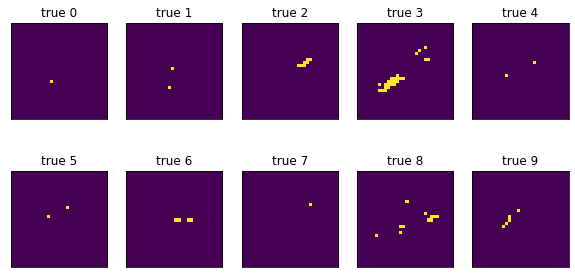

num layers: 3 num kernels: 64 lr: 0.0001 kernel size: 7
validation loss: 11.685955122773871
test loss: 8.593440473960538


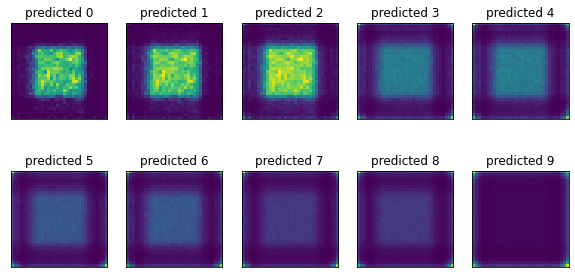

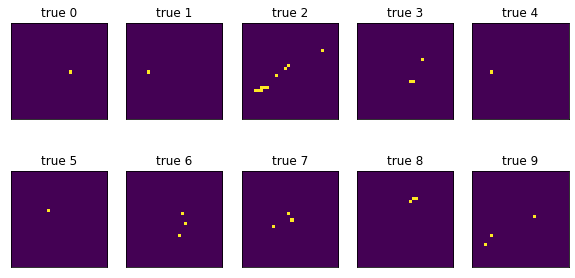

num layers: 3 num kernels: 64 lr: 1e-05 kernel size: 3
validation loss: 12.97730647871647
test loss: 11.900998120237453


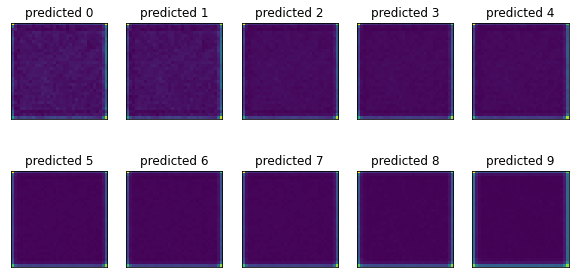

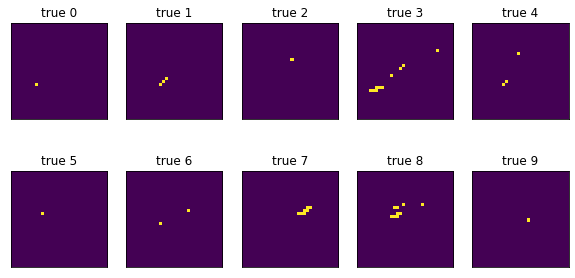

num layers: 3 num kernels: 64 lr: 1e-05 kernel size: 5
validation loss: 11.989071568832022
test loss: 10.08474753995247


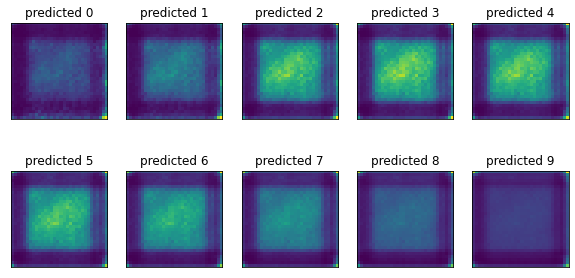

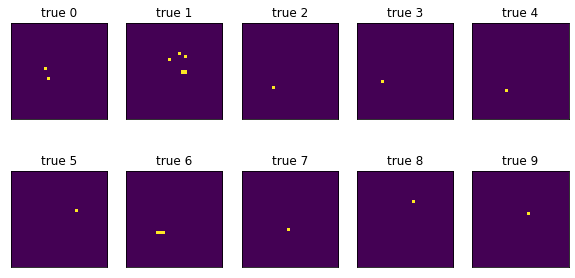

num layers: 3 num kernels: 64 lr: 1e-05 kernel size: 7
validation loss: 15.34207963238796
test loss: 13.644232970740408


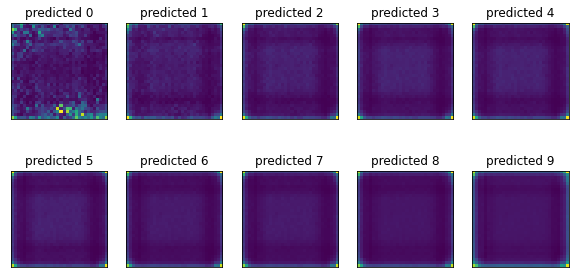

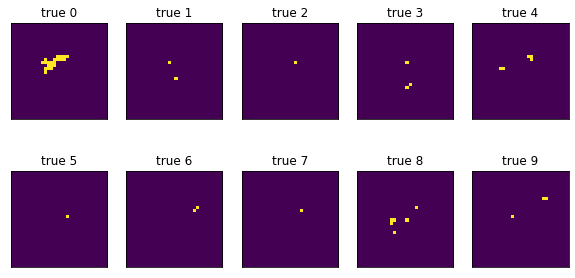

num layers: 3 num kernels: 96 lr: 0.0001 kernel size: 3
validation loss: 11.815753175707286
test loss: 11.289904364224139


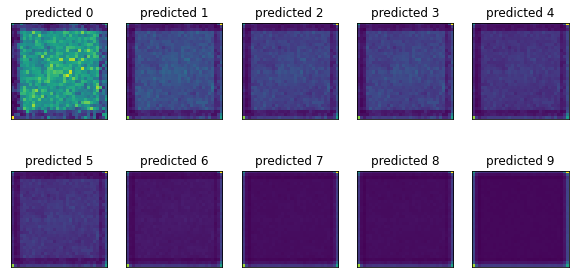

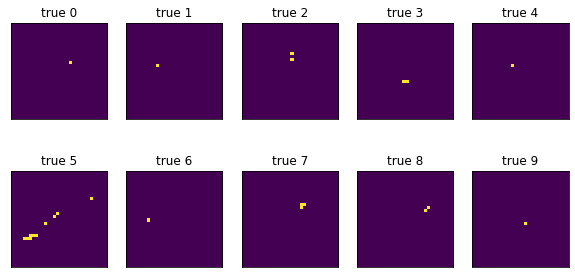

num layers: 3 num kernels: 96 lr: 0.0001 kernel size: 5
validation loss: 10.36652556546216
test loss: 9.232396205657809


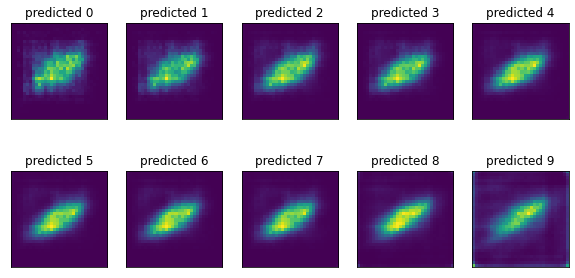

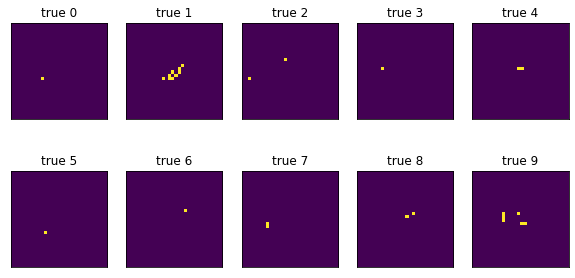

num layers: 3 num kernels: 96 lr: 0.0001 kernel size: 7
validation loss: 11.358013791990984
test loss: 9.584318959654258


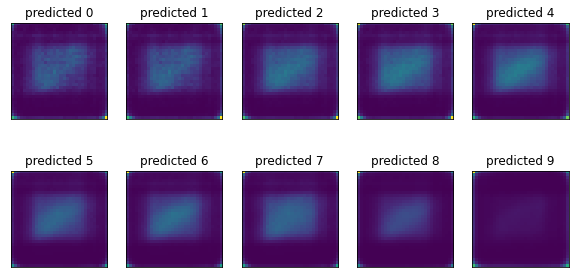

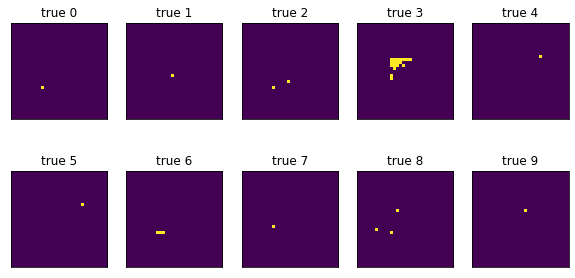

num layers: 3 num kernels: 96 lr: 1e-05 kernel size: 3
validation loss: 12.844804153066551
test loss: 14.61521563976269


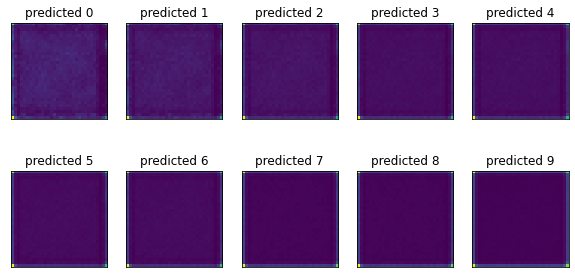

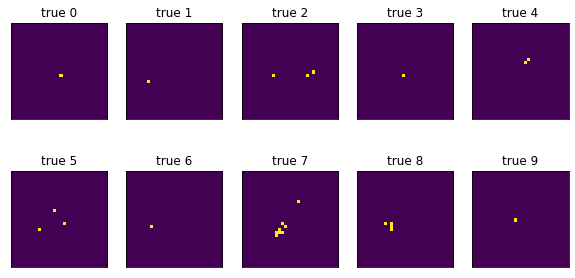

num layers: 3 num kernels: 96 lr: 1e-05 kernel size: 5
validation loss: 12.388380708365604
test loss: 11.200655443915005


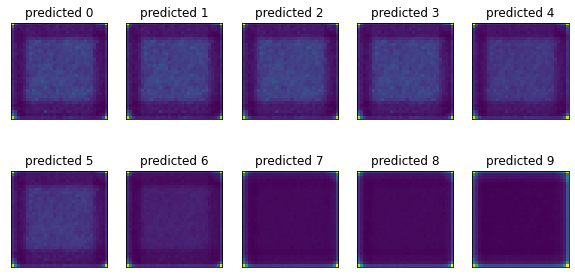

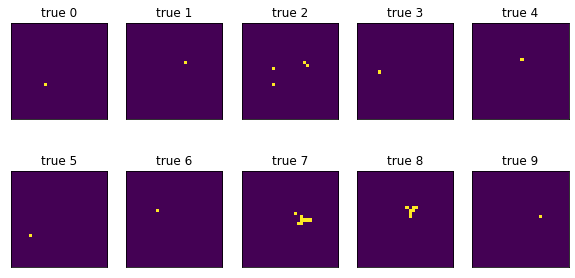

num layers: 3 num kernels: 96 lr: 1e-05 kernel size: 7
validation loss: 14.445464806016442
test loss: 10.695719451152632


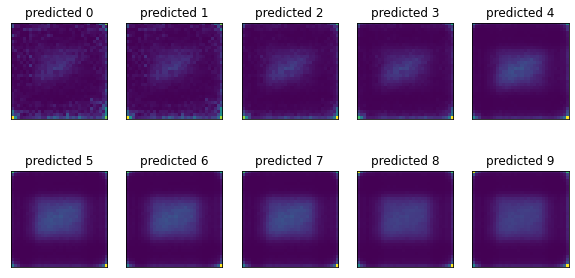

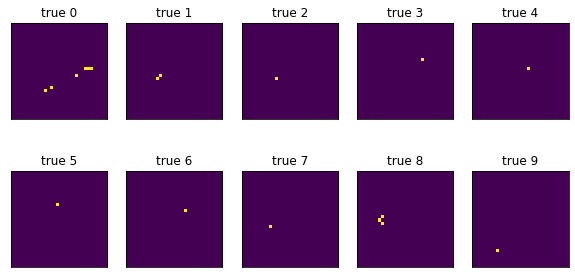

num layers: 5 num kernels: 32 lr: 0.0001 kernel size: 3
validation loss: 10.22689136260836
test loss: 9.183315511994762


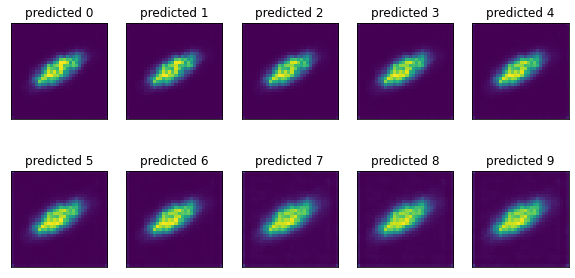

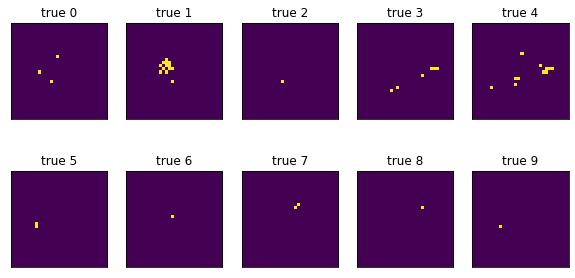

num layers: 5 num kernels: 32 lr: 0.0001 kernel size: 5
validation loss: 9.587775094168526
test loss: 7.579049528525968


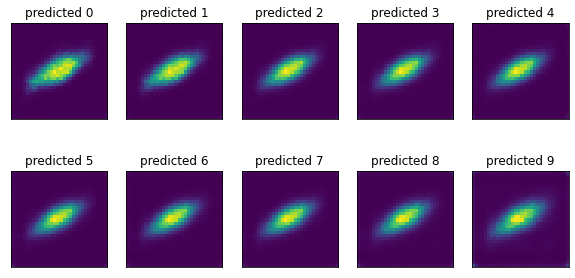

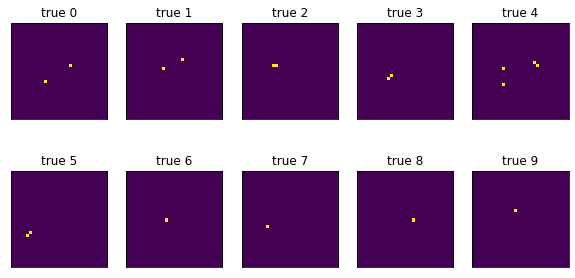

num layers: 5 num kernels: 32 lr: 0.0001 kernel size: 7
validation loss: 8.915102211712616
test loss: 8.668177825476736


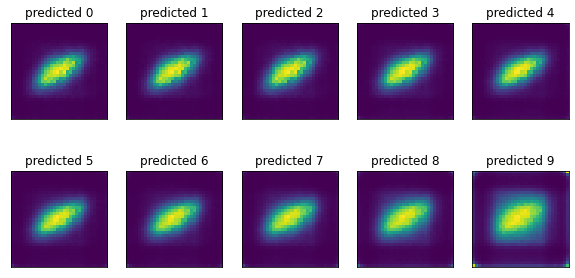

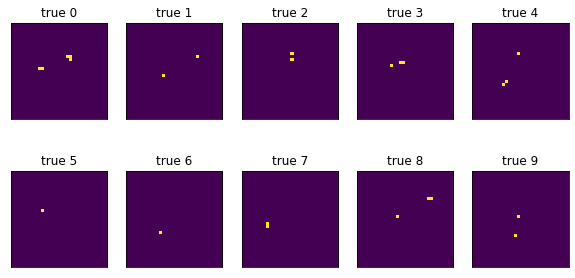

num layers: 5 num kernels: 32 lr: 1e-05 kernel size: 3
validation loss: 10.331249537726341
test loss: 9.532843002544835


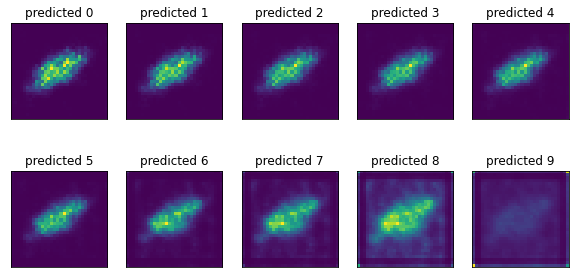

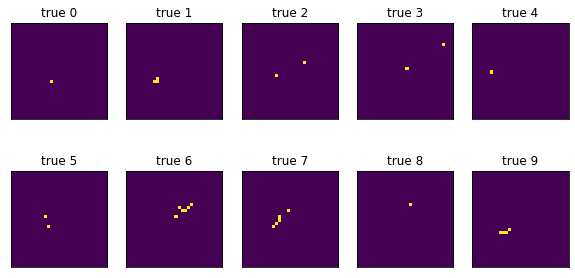

num layers: 5 num kernels: 32 lr: 1e-05 kernel size: 5
validation loss: 11.338472732769445
test loss: 10.927798454397418


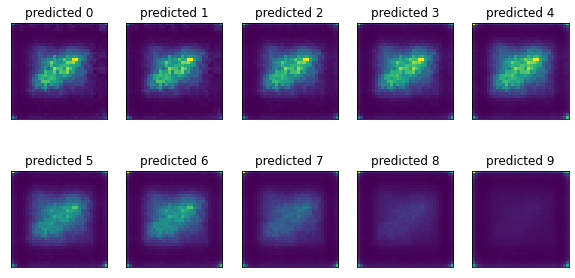

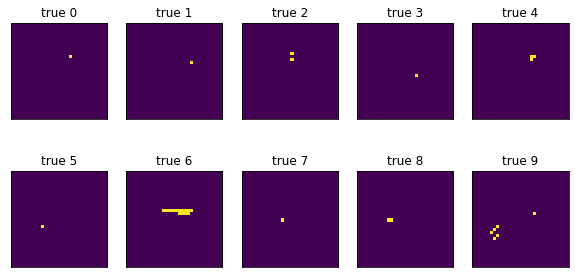

num layers: 5 num kernels: 32 lr: 1e-05 kernel size: 7
validation loss: 10.948418894424814
test loss: 9.473387506795047


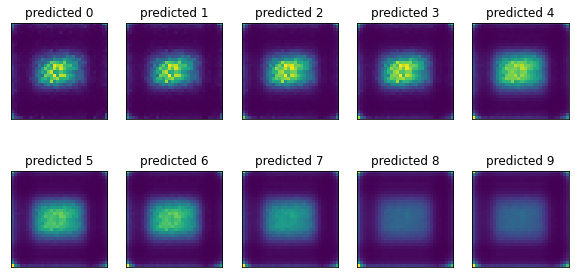

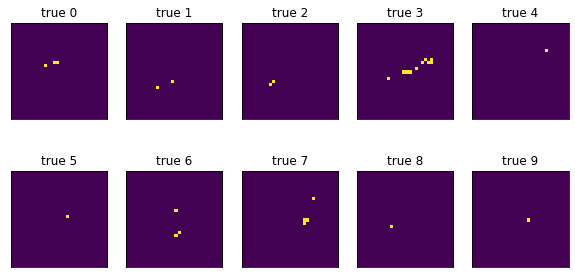

num layers: 5 num kernels: 64 lr: 0.0001 kernel size: 3
validation loss: 13.32926181736838
test loss: 9.387077857708109


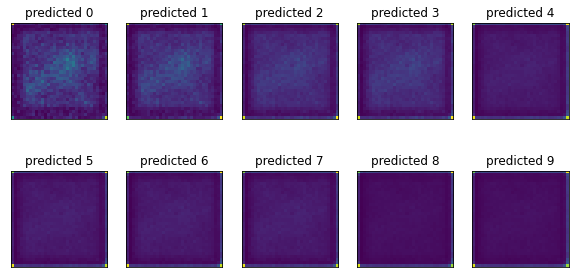

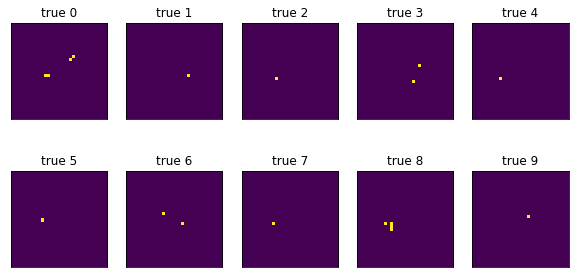

num layers: 5 num kernels: 64 lr: 0.0001 kernel size: 5
validation loss: 12.156503010265933
test loss: 8.51559566629344


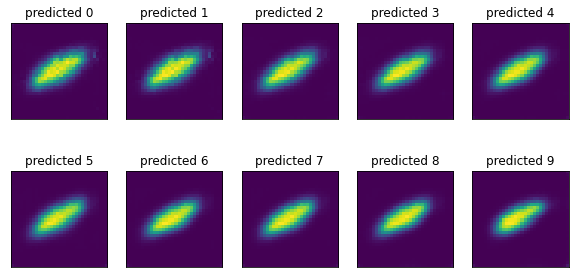

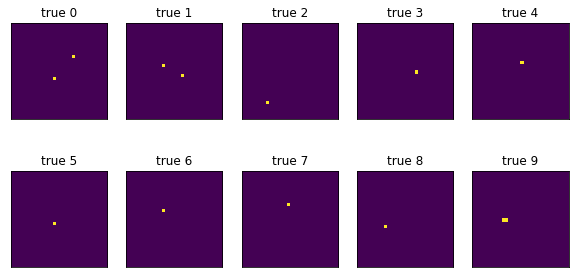

num layers: 5 num kernels: 64 lr: 0.0001 kernel size: 7
validation loss: 10.041421035240436
test loss: 10.245273195464035


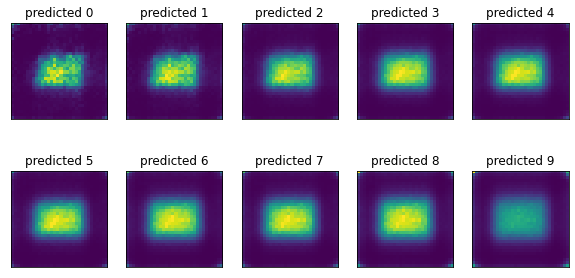

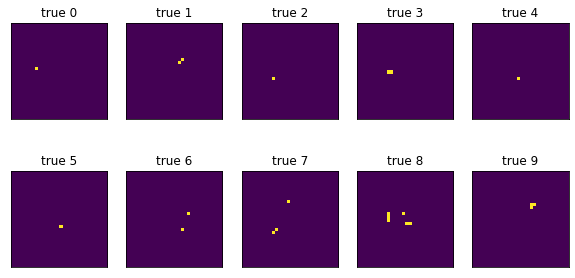

num layers: 5 num kernels: 64 lr: 1e-05 kernel size: 3
validation loss: 12.12708854675293
test loss: 9.906341703067271


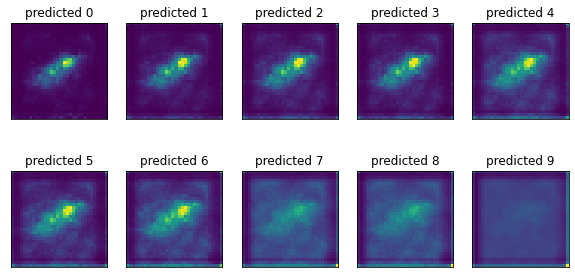

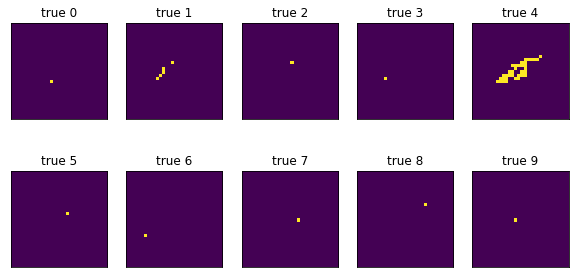

num layers: 5 num kernels: 64 lr: 1e-05 kernel size: 5
validation loss: 12.08434460080903
test loss: 8.834816054170355


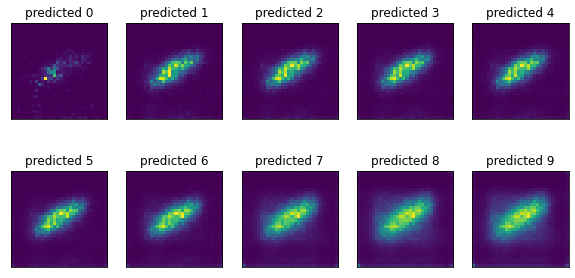

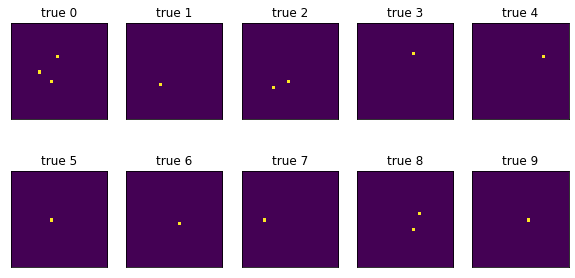

num layers: 5 num kernels: 64 lr: 1e-05 kernel size: 7
validation loss: 9.964625569987179
test loss: 7.809529816575825


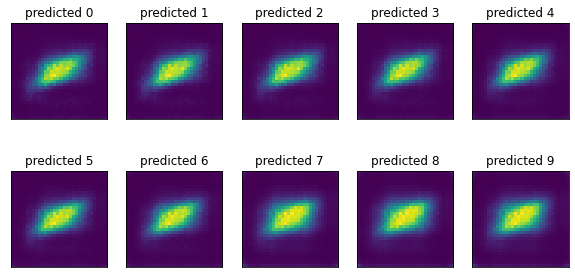

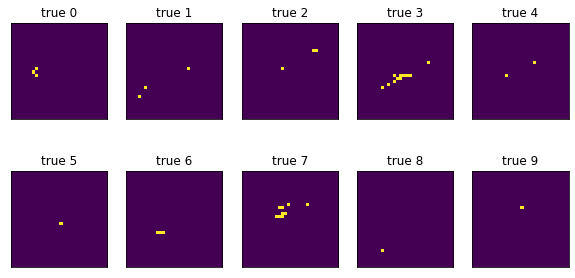

num layers: 5 num kernels: 96 lr: 0.0001 kernel size: 3
validation loss: 9.784066186162638
test loss: 7.516053956130455


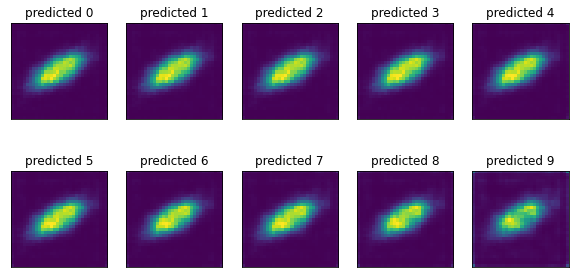

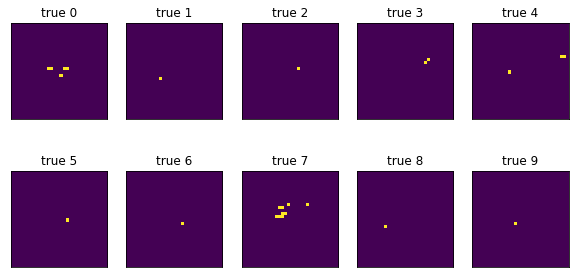

num layers: 5 num kernels: 96 lr: 0.0001 kernel size: 5
validation loss: 17.015641066828383
test loss: 7.8700524128129326


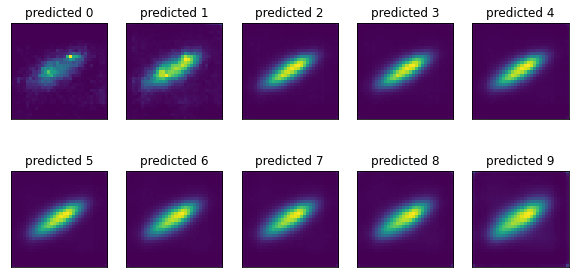

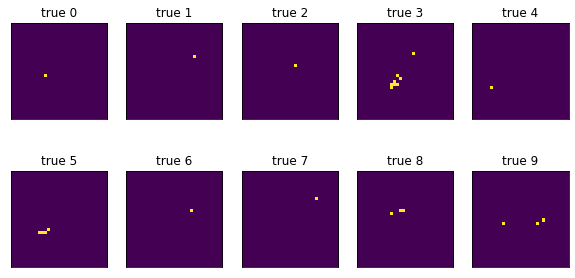

num layers: 5 num kernels: 96 lr: 0.0001 kernel size: 7
validation loss: 10.608726454485813
test loss: 11.390571519071832


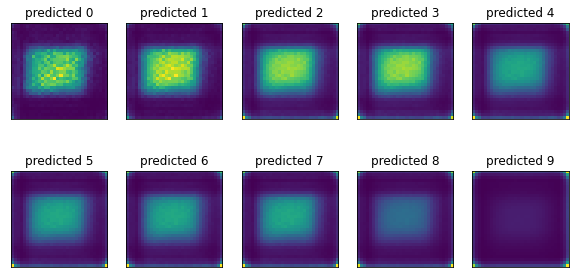

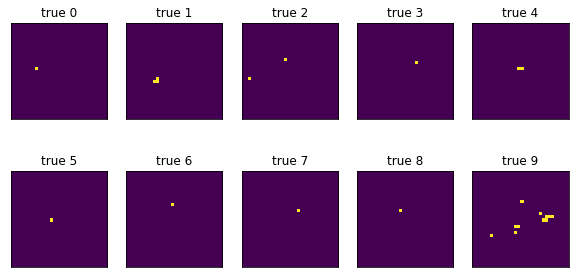

num layers: 5 num kernels: 96 lr: 1e-05 kernel size: 3
validation loss: 18.123093478198122
test loss: 19.478739170018088


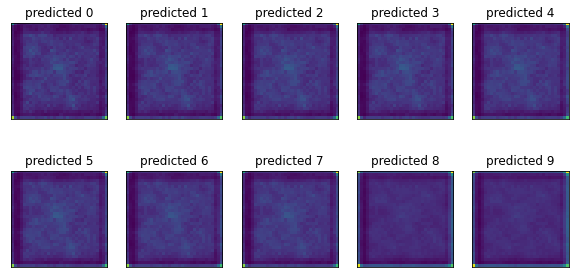

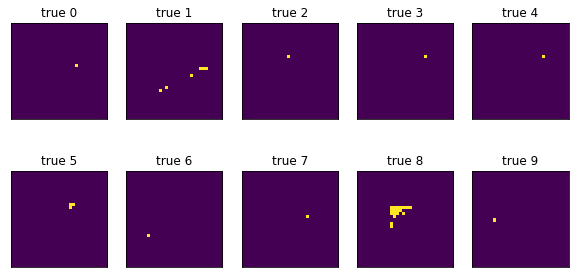

num layers: 5 num kernels: 96 lr: 1e-05 kernel size: 5
validation loss: 10.287000073587953
test loss: 8.525561252838285


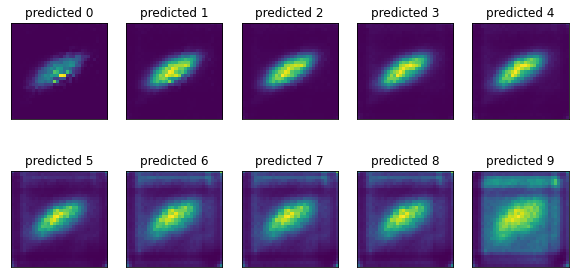

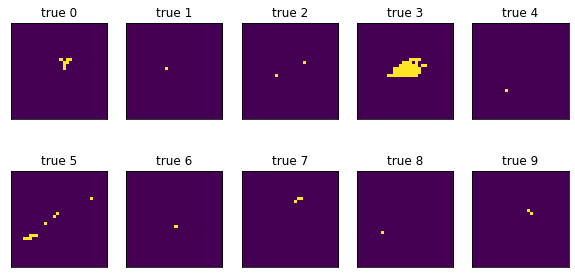

In [144]:
batch_size = 20
kernel_sizes=[3,5, 7]
num_layers=[1,3, 5]
lrs=[1e-4, 1e-5]
num_kernels=[32, 64, 96]
criterion = nn.BCELoss(reduction='sum')
np.random.seed(0)
torch.random.manual_seed(0)
results={"batch_size": [], "kernel_size": [], "learning_rate": [], "num_layers":[], "num_kernels":[], "val_loss":[], "test_loss":[]}

for nl in num_layers:
    for nk in num_kernels:
        for lr in lrs:
            for ks in kernel_sizes:
                filelist=[m for m in os.listdir("./trained_parameters/") if "nl_"+str(nl) in m and "nk_"+str(nk) in m and "lr"+str(lr) in m and "ks_"+str(ks)in m]
                if len(filelist) > 0:
                    results["batch_size"].append(batch_size)
                    results["num_layers"].append(nl)
                    results["num_kernels"].append(nk)
                    results["learning_rate"].append(lr)
                    results["kernel_size"].append(ks)
                    filename=filelist[0]
                    model=Seq2Seq(num_channels=7, out_channels=1, num_kernels=nk, 
                                  kernel_size=(ks, ks), padding=(ks//2, ks//2), activation="relu", 
                                  frame_size=(32, 32), num_layers=nl, variable_len=True).to(device)
                    MODEL_PATH=os.path.join("./trained_parameters/", filename)
                    model.load_state_dict(torch.load(MODEL_PATH))
                    model.eval();

                    val_loader=data_iter(val_data, batch_size=batch_size, device=device)
                    val_loss = 0                                                                                                   
                    with torch.no_grad():                                          
                        for input_data, target, length in val_loader:    
                            output = model(input_data, length)                                   
                            loss = criterion(output.squeeze(1).flatten(), target.flatten())   
                            val_loss += loss.item()                                
                    val_loss /= num_val 
                    print("num layers: " + str(nl) + " num kernels: " + str(nk) + " lr: " + str(lr) + " kernel size: " + str(ks))
                    print("validation loss: " + str(val_loss))

                    results["val_loss"].append(val_loss)
                    test_loader=data_iter(test_data, batch_size=batch_size, device=device)
                    test_loss = 0

                    with torch.no_grad():                                          
                        for input_data, target, length in test_loader:    
                            output = model(input_data, length)                                   
                            loss = criterion(output.squeeze(1).flatten(), target.flatten())   
                            test_loss += loss.item()                                
                    test_loss /= num_test
                    print("test loss: " + str(test_loss))
                    results["test_loss"].append(test_loss)
                    

                    test_loader=data_iter(test_data, batch_size=batch_size, device=device)
                    data, label, length = next(iter(test_loader))
                    
                    with torch.no_grad():
                        predicted = model(data, length)
                        fig, axs=plt.subplots(2,5, figsize=(10,5))
                        ax=axs.flatten()
                        for i in range(10):
                            ax[i].imshow(predicted[i].squeeze(0).detach().cpu().numpy())
                            ax[i].set_title("predicted {}".format(str(i)))
                            ax[i].set_xticks([])
                            ax[i].set_yticks([])
                        plt.show()
                        
                      
                        fig, axs=plt.subplots(2,5, figsize=(10,5))
                        ax=axs.flatten()
                        for i in range(10):
                            ax[i].imshow(label[i].cpu().numpy())
                            ax[i].set_xticks([])
                            ax[i].set_yticks([])
                            ax[i].set_title("true {}".format(str(i)))
                        plt.show()
  
     
                


In [182]:
r_df=pd.DataFrame(results)
r_df

,batch_size,kernel_size,learning_rate,num_layers,num_kernels,val_loss,test_loss
0,20,3,0.00010,1,32,10.974006,10.837771
1,20,5,0.00010,1,32,9.673466,9.272450
2,20,7,0.00010,1,32,10.247539,8.753167
3,20,3,0.00001,1,32,16.448685,15.646623
4,20,5,0.00001,1,32,15.564539,13.958037
5,20,7,0.00001,1,32,17.010074,15.234122
6,20,3,0.00010,1,64,10.123831,11.527855
7,20,5,0.00010,1,64,10.717531,10.184567
8,20,7,0.00010,1,64,10.648480,8.253598
9,20,3,0.00001,1,64,15.476759,15.595111


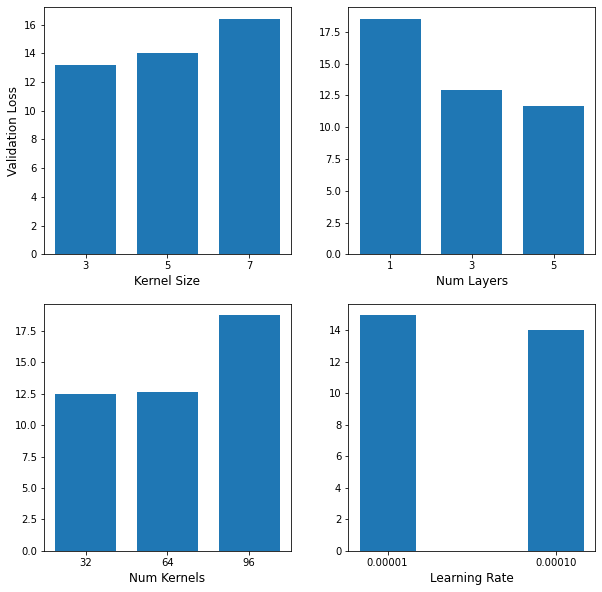

In [183]:
r_df=r_df.drop([50,])
# we exclude row 50 for fair comparison due to one missing model
fig, axs=plt.subplots(2,2, figsize=(10, 10))
ax=axs.flatten()
ax[0].bar([3,5,7], r_df.groupby("kernel_size").mean()["val_loss"], width=1.5)
ax[0].set_xlabel("Kernel Size", fontsize=12)
ax[0].set_ylabel("Validation Loss", fontsize=12)

ax[0].set_box_aspect(1)
ax[0].set_xticks([3,5,7])

ax[1].bar([1,3,5], r_df.groupby("num_layers").mean()["val_loss"], width=1.5)
ax[1].set_xlabel("Num Layers", fontsize=12)
ax[1].set_box_aspect(1)
ax[1].set_xticks([1,3,5])

ax[2].bar([32,64,96], r_df.groupby("num_kernels").mean()["val_loss"], width=24)
ax[2].set_xlabel("Num Kernels", fontsize=12)
ax[2].set_box_aspect(1)
ax[2].set_xticks([32,64,96])

ax[3].bar([1e-5,1e-4], r_df.groupby("learning_rate").mean()["val_loss"], width=3e-5)
ax[3].set_xlabel("Learning Rate", fontsize=12)
ax[3].set_box_aspect(1)
ax[3].set_xticks([1e-5,1e-4])

plt.savefig("parameters.png", dpi=300)

In [180]:
num_train, num_val, num_test

(4059, 812, 203)